# <b>Car accident severity</b>

# <b>This notebook will be used to build a machine learning model to predict car accident severity</b>

## <b>Author: Sergio Esposito

### <b>September 2020

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#data">Getting, analyzing and preparing data</a></li>
        <li><a href="#choose_model">Choosing a model</a></li>
        <li><a href="#use_model">Using the chosen model</a></li>
    </ol>
</div>
<br>
<hr>

<div id="data">
    <h2>(1) Getting, analyzing and preparing data</h2>
</div>

In [1]:
#I need Pandas Library
import pandas as pd

In [2]:
#I will use the dataset provided by Coursera
df_data_collisions=pd.read_csv('../../data/Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_data_collisions.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#The model will be able to predict  "severity"
#After analyzing I have decided to work with the attributes  ADDRTYPE, COLLISIONTYPE, PERSONCOUNT, VEHCOUNT,
#JUNCTIONTYPE, WEATHER, ROADCOND, LIGHTCOND, SPEEDING, ST_COLCODE
df_data_collisions_selection=df_data_collisions[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE', 'PERSONCOUNT',
                                            'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
                                            'LIGHTCOND', 'ST_COLCODE']]

In [5]:
df_data_collisions_selection.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,Intersection,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,10
1,1,Block,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,11
2,1,Block,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,32
3,1,Block,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,23
4,2,Intersection,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight,10


In [6]:
df_data_collisions_selection.describe()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000
mean,1.298901,2.444427,1.920780
std,0.457778,1.345929,0.631047
min,1.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000
50%,1.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000
max,2.000000,81.000000,12.000000


In [7]:
df_data_collisions_selection.SEVERITYCODE.unique()

array([2, 1])

In [8]:
#I will list the distinct values of our attributes
df_data_collisions_selection.ADDRTYPE.unique()

array(['Intersection', 'Block', 'Alley', nan], dtype=object)

In [9]:
df_data_collisions_selection.COLLISIONTYPE.unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', nan, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

In [10]:
df_data_collisions_selection.PERSONCOUNT.unique()

array([ 2,  4,  3,  0,  1,  5,  6, 16,  8,  7, 11,  9, 12, 17, 26, 22, 10,
       37, 13, 36, 28, 14, 53, 19, 30, 29, 23, 44, 15, 32, 21, 41, 27, 20,
       35, 43, 81, 18, 25, 48, 24, 34, 57, 39, 47, 54, 31])

In [11]:
df_data_collisions_selection.VEHCOUNT.unique()

array([ 2,  3,  1,  0,  4,  7,  5,  6,  8, 11,  9, 10, 12])

In [12]:
df_data_collisions_selection.JUNCTIONTYPE.unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Unknown', 'Ramp Junction'], dtype=object)

In [13]:
df_data_collisions_selection.WEATHER.unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [14]:
df_data_collisions_selection.ROADCOND.unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [15]:
df_data_collisions_selection.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

In [16]:
df_data_collisions_selection.ST_COLCODE.unique()

array(['10', '11', '32', '23', '5', '22', '14', '30', ' ', '28', '51',
       '13', '50', '12', '45', '0', '20', '21', '1', '52', '16', '15',
       '74', '81', '26', '19', '2', '66', '71', '3', '24', '40', '57',
       '6', '83', '25', '27', '4', '72', '29', '56', '73', '41', '17',
       '65', '82', '67', '49', '84', '31', '43', '42', '48', '64', '53',
       32, 50, 15, 10, 14, 20, 13, 22, 51, 11, 28, 12, 52, 21, 0, 19, 30,
       16, 40, 26, 27, 83, 2, 45, 65, 23, 24, 71, 1, 29, 81, 25, 4, 73,
       74, 72, 3, 84, 64, 57, 42, 41, 48, 66, 56, 31, 82, 67, '54', '60',
       53, 43, 87, 54, '87', nan, '7', '8', '85', '88', '18'],
      dtype=object)

In [17]:
#As I have nan values, I will delete those rows
df_data_collisions_selection = df_data_collisions_selection.dropna()
df_data_collisions_selection = df_data_collisions_selection.reset_index(drop=True)

In [18]:
df_data_collisions_selection.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,Intersection,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,10
1,1,Block,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,11
2,1,Block,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,32
3,1,Block,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,23
4,2,Intersection,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight,10


In [19]:
#Now I will convert object data data
df_data_collisions_selection.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
dtype: object

In [20]:
df_data_collisions_final = df_data_collisions_selection
df_data_collisions_final['ADDRTYPE'] = pd.factorize(df_data_collisions_selection['ADDRTYPE'])[0] + 1
df_data_collisions_final['COLLISIONTYPE'] = pd.factorize(df_data_collisions_selection['COLLISIONTYPE'])[0] + 1
df_data_collisions_final['JUNCTIONTYPE'] = pd.factorize(df_data_collisions_selection['JUNCTIONTYPE'])[0] + 1
df_data_collisions_final['WEATHER'] = pd.factorize(df_data_collisions_selection['WEATHER'])[0] + 1
df_data_collisions_final['ROADCOND'] = pd.factorize(df_data_collisions_selection['ROADCOND'])[0] + 1
df_data_collisions_final['LIGHTCOND'] = pd.factorize(df_data_collisions_selection['LIGHTCOND'])[0] + 1
df_data_collisions_final['ST_COLCODE'] = pd.factorize(df_data_collisions_selection['ST_COLCODE'])[0] + 1

In [21]:
#For better comprehension, severity code 1=prop damage 2=injury
df_data_collisions_final.SEVERITYCODE[df_data_collisions_final.SEVERITYCODE == 1] = 'Prop damage' 
df_data_collisions_final.SEVERITYCODE[df_data_collisions_final.SEVERITYCODE == 2] = 'Injury' 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#Now the data is almost as I need
df_data_collisions_final.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,Injury,1,1,2,2,1,1,1,1,1
1,Prop damage,2,2,2,2,2,2,1,2,2
2,Prop damage,2,3,4,3,2,1,2,1,3
3,Prop damage,2,4,3,3,2,3,2,1,4
4,Injury,1,1,2,2,1,2,1,1,1


In [23]:
df_data_collisions_final.describe()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
count,182895.000000,182895.000000,182895.000000,182895.000000,182895.000000,182895.000000,182895.000000,182895.000000,182895.000000
mean,1.655196,4.001482,2.476268,1.971984,2.004511,2.628514,1.847951,1.687072,26.261800
std,0.478001,2.419532,1.370912,0.563237,0.998280,0.916689,0.657128,1.209132,26.668762
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000
50%,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,12.000000
75%,2.000000,6.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,56.000000
max,3.000000,10.000000,81.000000,12.000000,7.000000,11.000000,9.000000,9.000000,114.000000


In [24]:
df_data_collisions_final.dtypes

SEVERITYCODE     object
ADDRTYPE          int64
COLLISIONTYPE     int64
PERSONCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE      int64
WEATHER           int64
ROADCOND          int64
LIGHTCOND         int64
ST_COLCODE        int64
dtype: object

In [25]:
# A final check to see if the dataset is balanced
df_data_collisions_final.groupby(['SEVERITYCODE']).agg(['count'])

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
,count,count,count,count,count,count,count,count,count
SEVERITYCODE,,,,,,,,,
Injury,56625,56625,56625,56625,56625,56625,56625,56625,56625
Prop damage,126270,126270,126270,126270,126270,126270,126270,126270,126270


In [26]:
#Ratio Prop damage:Injury is 2.23:1. I will deal with this by adding copies of instances from the 
#under-represented class Injury
df_injury=df_data_collisions_final.loc[df_data_collisions_final['SEVERITYCODE'] == 'Injury']
frames = [df_data_collisions_final, df_injury]
df_data_collisions_final = pd.concat(frames)
df_data_collisions_final.groupby(['SEVERITYCODE']).agg(['count'])

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
,count,count,count,count,count,count,count,count,count
SEVERITYCODE,,,,,,,,,
Injury,113250,113250,113250,113250,113250,113250,113250,113250,113250
Prop damage,126270,126270,126270,126270,126270,126270,126270,126270,126270


<div id="choose_model">
    <h2>(2) Choosing a model</h2>
    As the variable to predict has a discrete set of values, I have chosen to work with classification techniques. So, I will test three classification techniques(SVM, Logistic regression and Decision tree with a subset of the data (20,000 rows)
</div>

### (2.1) SVM (Support Vector Machines)

In [27]:
#I will  start with SVM (Support Vector Machines)
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [28]:
df_data_collisions_final_subset = df_data_collisions_final.head(20000)
#Now I create the arrays needed 
feature_df = df_data_collisions_final_subset[['ADDRTYPE',  'COLLISIONTYPE',  'PERSONCOUNT', 'VEHCOUNT',  'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']]
X = np.asarray(feature_df)
X[0:5]

array([[1, 1, 2, 2, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 1, 2, 2],
       [2, 3, 4, 3, 2, 1, 2, 1, 3],
       [2, 4, 3, 3, 2, 3, 2, 1, 4],
       [1, 1, 2, 2, 1, 2, 1, 1, 1]])

In [29]:
y = np.asarray(df_data_collisions_final_subset['SEVERITYCODE'])
y [0:5]

array(['Injury', 'Prop damage', 'Prop damage', 'Prop damage', 'Injury'],
      dtype=object)

In [30]:
#Now I'll split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16000, 9) (16000,)
Test set: (4000, 9) (4000,)


In [31]:
#Now I'll build the model: SVM algorithm with kernel function Radial basis function (RBF) i.e. the default
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['Prop damage', 'Prop damage', 'Prop damage', 'Prop damage',
       'Prop damage'], dtype=object)

In [33]:
#Now let's evaluate the accuracy of the model
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

      Injury       0.64      0.32      0.43      1233
 Prop damage       0.75      0.92      0.83      2767

   micro avg       0.73      0.73      0.73      4000
   macro avg       0.70      0.62      0.63      4000
weighted avg       0.72      0.73      0.70      4000

Confusion matrix, without normalization
[[2544  223]
 [ 838  395]]


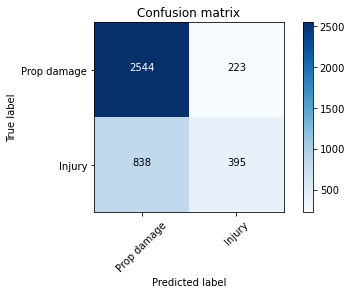

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Prop damage', 'Injury'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Prop damage', 'Injury'],normalize= False,  title='Confusion matrix')

In [36]:
#Let's see the accuracy
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.73475

### (2.2) Logistic regression

In [37]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.44, -1.28, -0.39,  0.03, -1.06, -1.77, -1.34, -0.56, -0.75],
       [ 0.68, -0.85, -0.39,  0.03, -0.12, -0.68, -1.34,  0.28, -0.71],
       [ 0.68, -0.42,  1.05,  1.91, -0.12, -1.77,  0.25, -0.56, -0.66],
       [ 0.68,  0.01,  0.33,  1.91, -0.12,  0.41,  0.25, -0.56, -0.62],
       [-1.44, -1.28, -0.39,  0.03, -1.06, -0.68, -1.34, -0.56, -0.75]])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16000, 9) (16000,)
Test set: (4000, 9) (4000,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
yhat = LR.predict(X_test)
yhat

array(['Prop damage', 'Prop damage', 'Prop damage', ..., 'Prop damage',
       'Prop damage', 'Prop damage'], dtype=object)

In [41]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5 , 0.5 ],
       [0.14, 0.86],
       [0.23, 0.77],
       ...,
       [0.19, 0.81],
       [0.16, 0.84],
       [0.19, 0.81]])

In [42]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.68625

              precision    recall  f1-score   support

      Injury       0.48      0.23      0.31      1233
 Prop damage       0.72      0.89      0.80      2767

   micro avg       0.69      0.69      0.69      4000
   macro avg       0.60      0.56      0.55      4000
weighted avg       0.65      0.69      0.65      4000

Confusion matrix, without normalization
[[2463  304]
 [ 951  282]]


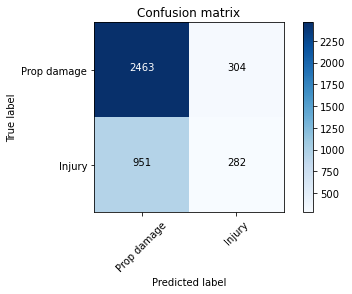

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Prop damage', 'Injury'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Prop damage', 'Injury'],normalize= False,  title='Confusion matrix')


In [44]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

      Injury       0.48      0.23      0.31      1233
 Prop damage       0.72      0.89      0.80      2767

   micro avg       0.69      0.69      0.69      4000
   macro avg       0.60      0.56      0.55      4000
weighted avg       0.65      0.69      0.65      4000



### (2.3) Decision tree

In [45]:
X = df_data_collisions_final_subset[['ADDRTYPE',  'COLLISIONTYPE',  'PERSONCOUNT', 'VEHCOUNT',  'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']].values
X[0:5]

array([[1, 1, 2, 2, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 1, 2, 2],
       [2, 3, 4, 3, 2, 1, 2, 1, 3],
       [2, 4, 3, 3, 2, 3, 2, 1, 4],
       [1, 1, 2, 2, 1, 2, 1, 1, 1]])

In [46]:
y = df_data_collisions_final_subset["SEVERITYCODE"]
y[0:5]

0         Injury
1    Prop damage
2    Prop damage
3    Prop damage
4         Injury
Name: SEVERITYCODE, dtype: object

In [47]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (16000, 9) (16000,)
Test set: (4000, 9) (4000,)


In [48]:
from sklearn.tree import DecisionTreeClassifier
carAccidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
carAccidentTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
carAccidentTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
#I have built the tree, now I'll make predictions
predTree = carAccidentTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['Prop damage' 'Injury' 'Prop damage' 'Prop damage' 'Prop damage']
1406     Prop damage
2053          Injury
12217    Prop damage
9794     Prop damage
2802     Prop damage
Name: SEVERITYCODE, dtype: object


In [51]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7465


Logistic regression has provided less accuracy than SVM and decision tree. 
<br>
Accuracy of SVM and Decision Tree are similar.
<br>
SVM performance is worse than decision tree performance.
<br>
#### So, I choose decision tree as my model

<div id="use_model">
    <h2>(3) Using the chosen model</h2>
</div>

In [52]:
#I will run the decision tree with the full data set
X = df_data_collisions_final[['COLLISIONTYPE',  'PERSONCOUNT', 'VEHCOUNT',  'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']].values
X[0:5]


array([[1, 2, 2, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 1, 2, 2],
       [3, 4, 3, 2, 1, 2, 1, 3],
       [4, 3, 3, 2, 3, 2, 1, 4],
       [1, 2, 2, 1, 2, 1, 1, 1]])

In [53]:
y = df_data_collisions_final["SEVERITYCODE"]
y[0:5]

0         Injury
1    Prop damage
2    Prop damage
3    Prop damage
4         Injury
Name: SEVERITYCODE, dtype: object

In [54]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (191616, 8) (191616,)
Test set: (47904, 8) (47904,)


In [55]:
carAccidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
carAccidentTree.fit(X_trainset,y_trainset)
predTree = carAccidentTree.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6934076486305946


#### I will plot the tree

In [56]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

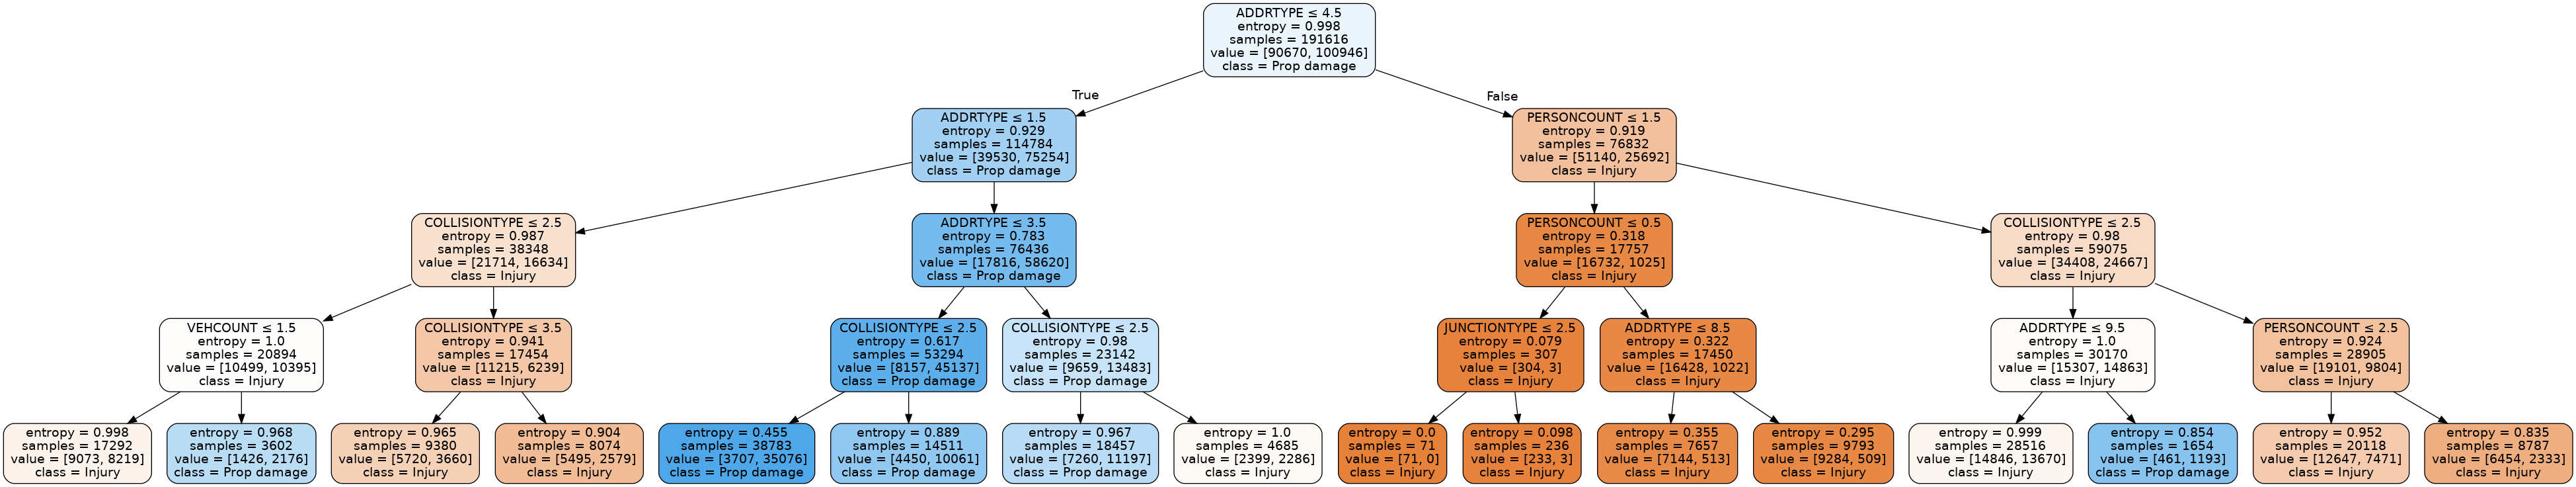

In [57]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
featureNames = df_data_collisions_final.columns[1:9]
export_graphviz(carAccidentTree, 
                feature_names=featureNames,
                out_file=dot_data,
                class_names= np.unique(y_trainset),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### My model can predict the severity of a car accident with a 69.3% of accuracy